Topic Modeling with Latent Dirichlet Allocation (LDA)

In [32]:
import numpy as np
import pandas as pd
import torch

# from transformers import AutoTokenizer, AutoModel
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.feature_extraction.text import TfidfVectorizer
# from umap import UMAP
# from hdbscan import HDBSCAN

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary

import matplotlib.pyplot as plt
from wordcloud import WordCloud

Dataset

In [5]:
news_dataset = fetch_20newsgroups(subset='all')

In [6]:
data = news_dataset.data

In [7]:
len(data)

18846

Vectorizer to convert text to numerical features

In [8]:
vectorizer = CountVectorizer(max_features=1000, stop_words='english')

In [9]:
X = vectorizer.fit_transform(data)

Visualize embeddings

In [14]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '01', '02', '03', '04', '0d', '0t', '10', '100', '11',
       '12', '13', '14', '145', '15', '16', '17', '18', '19', '1992',
       '1993', '1d9', '1t', '20', '200', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '34u', '35',
       '36', '37', '38', '39', '3d', '3t', '40', '408', '41', '42', '43',
       '44', '45', '48', '49', '50', '500', '51', '55', '60', '70', '75',
       '75u', '80', '800', '90', '91', '92', '93', '__', '___', 'a86',
       'able', 'ac', 'accept', 'access', 'according', 'acs', 'act',
       'action', 'actually', 'add', 'address', 'administration',
       'advance', 'advice', 'ago', 'agree', 'air', 'al', 'algorithm',
       'allow', 'alt', 'america', 'american', 'analysis', 'andrew',
       'anonymous', 'answer', 'answers', 'anti', 'anybody', 'appears',
       'apple', 'application', 'applications', 'appreciated', 'apr',
       'april', 'arab', 'area', 'aren', 'argument', 'armenia', 'armenian',
     

In [21]:
features = {}
for i, feature in enumerate(feature_names):
    features[feature] = X[:, i].sum()

In [23]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(features)

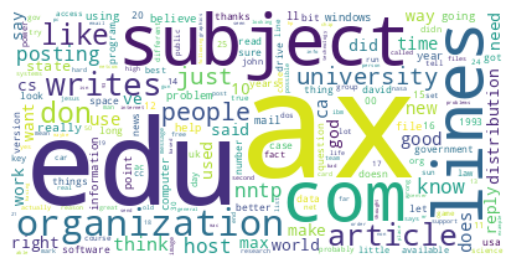

In [24]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
n_topics = 20
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50, learning_method='online')

In [11]:
lda.fit(X)

LatentDirichletAllocation(learning_method='online', max_iter=50,
                          n_components=20)

In [30]:
for topic_idx, topic in enumerate(lda.components_):
    print("Topic: ", topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic:  0
people government gun right law state rights think person guns
Topic:  1
edu university subject organization lines posting host nntp article cs
Topic:  2
windows dos card pc mac apple memory software video bit
Topic:  3
ca subject organization lines sale canada __ university virginia ___
Topic:  4
file image graphics files ftp available pub images programs program
Topic:  5
israel number information jews israeli group general research questions use
Topic:  6
subject lines organization thanks help mail know need does posting
Topic:  7
don just like think know good time ve really way
Topic:  8
max 145 berkeley pitt toronto eng henry umd purdue cable
Topic:  9
00 1993 10 apr 20 93 15 50 gmt 30
Topic:  10
drive key access chip scsi clipper encryption use data public
Topic:  11
com lines subject writes organization article posting nntp host netcom
Topic:  12
said 000 president armenian turkish people new armenians years world
Topic:  13
god people jesus christian believe say does 

Evaluate